# Part 1: Research Question

Which variables are the most significant factors in predicting customer churn?

## Import packages

In [1]:
# pandas used for import and manipulation of dataframes
import pandas as pd
# numpy used for statistical calculations
import numpy as np
# matplotlib & seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# scipy.stats for calculating zscores of fields
import scipy.stats as stats
# sklearn for principal component analysis
from sklearn.decomposition import PCA
# missingno to visualize missing values
import missingno as msno

## Import churn data set

In [2]:
churn_df = pd.read_csv('churn_raw_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


## Identify Variables

#### Inspect churn_df

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

#### Describe variables with data dictionary

| Variable | Type | Description |
| :--- | :--- | :-- |
| Unnamed: 0 | Object | Index |
| CaseOrder | Object | Original index |
| Customer_id | Object | Primary key, id for customer |
| Interaction | Object | Key of customer account creation |
| City | Object | City where customer resides |
| State | Object | State where customer resides |
| Country | Object | Country where customer resides |
| Zip | Object | Zip of where customer resides |
| Lat | Float64 | Spatial data, latitude of residence |
| Lng | Float64 | Spatial data, longtiude of residence |
| Population | Int64 | Population within a mile radius of customer residence, based on census data |
| Area | Object | Area type (rural, urban, suburban) based on census data |
| TimeZone | Object | Time zone of customer's residence |
| Job | Object | Job of customer |
| Children | Float64 | Number of children in customer's household |
| Age | Float64 | Age of customer |
| Education | Object | Highest degree earned by customer |
| Employment | Object | Employment status of customer |
| Income | Float64 | Annual income of customer |
| Marital | Object | Marital status of customer |
| Gender | Object | Customer self-identificationas male, female, or non-binary |
| Churn | Object | Whether the customer discontinued service within the past month (yes/no) |
| Outage_sec_perweek | Float64 | Average number of seconds per week the system experiences an outage in the customer's neighborhood |
| Email | Int64 | Number of emails sent to customer in the last year |
| Contacts | Int64 | Number of times customer contacted technical suport |
| Yearly_equip_failure | Int64 | Number of times customer's equipment failed and had tobe reset/ replaced in the past year |
| Techie | Object | Whether customer considers themselves technically inclined (yes/no) |
| Contract | Object | The contract term of the customer (yes/no) |
| Port_modem | Object | Whether customer has portable modem (boolean, yes/no) |
| Tablet | Object | Whether customer has tablet (yes/no) |
| InternetService | Object | Customer's internet service provider |
| Phone | Object | Whether the customer has a phone service (yes/no) |
| Multiple | Object | Whether the customer has multiple lines (yes/no) |
| OnlineSecurity | Object | Whether the customer has an online security add-on (yes/no) |
| OnlineBackup | Object | Whether the customer has an online backup add-on (yes/no) |
| DeviceProtection | Object | Whether the customer has device protection add-on (yes/no) |
| TechSupport | Object | Whether the customer has a technical support add-on (yes/no) |
| StreamingTV | Object | Whether the customer has TV streaming (yes/no) |
| StreamingMovies | Object | Whether the customer has movie streaming (yes/no) |
| PaperlessBilling | Object | Whether the customer has paperless billing (yes/no) |
| PaymentMethod | Object | Customer payment method |
| Tenure | Float64 | Number of months the customer has stayed with the provider |
| MonthlyCharge | Float64 | Amount charged monthly |
| Bandwidth_GB_Year | Float64 | The average amount of data used in GB per year |
| item1 | Int64 | Timely response |
| item2 | Int64 | Timely fixes |
| item3 | Int64 | Timely replacements |
| item4 | Int64 | Reliability |
| item5 | Int64 | Options |
| item6 | Int64 | Respectful response |
| item7 | Int64 | Courteous exchange |
| item8 | Int64 | Evidence of active listening |

#### Explore categorical values in data set

In [5]:
categorical_fields = ['Area', 'Timezone', 'Education', 
                      'Employment', 'Marital', 'Gender', 
                      'PaymentMethod', 'item1', 'item2', 
                      'item3', 'item4', 'item5', 
                      'item6', 'item7', 'item8']

for i in categorical_fields:
    unique_values = churn_df[i].unique()
    print(i)
    print(str(len(unique_values)) + ' unique values')
    print(sorted(unique_values))
    print("\n")

Area
3 unique values
['Rural', 'Suburban', 'Urban']


Timezone
25 unique values
['America/Anchorage', 'America/Boise', 'America/Chicago', 'America/Denver', 'America/Detroit', 'America/Indiana/Indianapolis', 'America/Indiana/Knox', 'America/Indiana/Marengo', 'America/Indiana/Petersburg', 'America/Indiana/Tell_City', 'America/Indiana/Vincennes', 'America/Indiana/Winamac', 'America/Juneau', 'America/Kentucky/Louisville', 'America/Los_Angeles', 'America/Menominee', 'America/New_York', 'America/Nome', 'America/North_Dakota/New_Salem', 'America/Ojinaga', 'America/Phoenix', 'America/Puerto_Rico', 'America/Sitka', 'America/Toronto', 'Pacific/Honolulu']


Education
12 unique values
['9th Grade to 12th Grade, No Diploma', "Associate's Degree", "Bachelor's Degree", 'Doctorate Degree', 'GED or Alternative Credential', "Master's Degree", 'No Schooling Completed', 'Nursery School to 8th Grade', 'Professional School Degree', 'Regular High School Diploma', 'Some College, 1 or More Years, No Degree', '

#### Identify missing values

In [6]:
churn_df.isna().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

#### Fields with missing values:

1. Children - INT - (2,495 / 24.95%)
2. Age - INT - (2,475 / 24.75%)
3. Income - FLOAT - (2,490 / 24.90%)
4. Techie - BOOL - (2,477 / 24.77%)
5. Phone - BOOL - (1,026 / 10.26%)
6. TechSupport - BOOL - (991 / 9.91%)
7. Tenure - FLOAT - (931 / 9.31%)
8. Bandwidth_GB_Year - FLOAT - (1,021 / 10.21%)

#### Check for duplicated data

In [7]:
churn_df.duplicated().any()

False

## Identify missing data

#### Check to see if there are any completely null columns

In [8]:
churn_df.isnull().all(axis=0).any()

False

#### Check to see if there are any completely null rows

In [9]:
churn_df.isnull().all(axis=1).any()

False

#### Identify rows with missing values
Not enough rows contain enough missing values to justify being removed from the dataset. The worst cases are 3 rows in the dataset which only contain 6 missing values each.

In [10]:
for i in range(6):
    print(str(sum(churn_df.isnull().sum(axis=1) > i)) + ' / ' + 
          str(round(sum(churn_df.isnull().sum(axis=1) > i)/len(churn_df)*100,2)) + 
          '% rows with ' + str(i+1) + ' or more missing values.')

7867 / 78.67% rows with 1 or more missing values.
4221 / 42.21% rows with 2 or more missing values.
1437 / 14.37% rows with 3 or more missing values.
333 / 3.33% rows with 4 or more missing values.
45 / 0.45% rows with 5 or more missing values.
3 / 0.03% rows with 6 or more missing values.


#### Visualize missing values as a matrix to determine whether they are missing completely at random, missing at random, or missing not at random

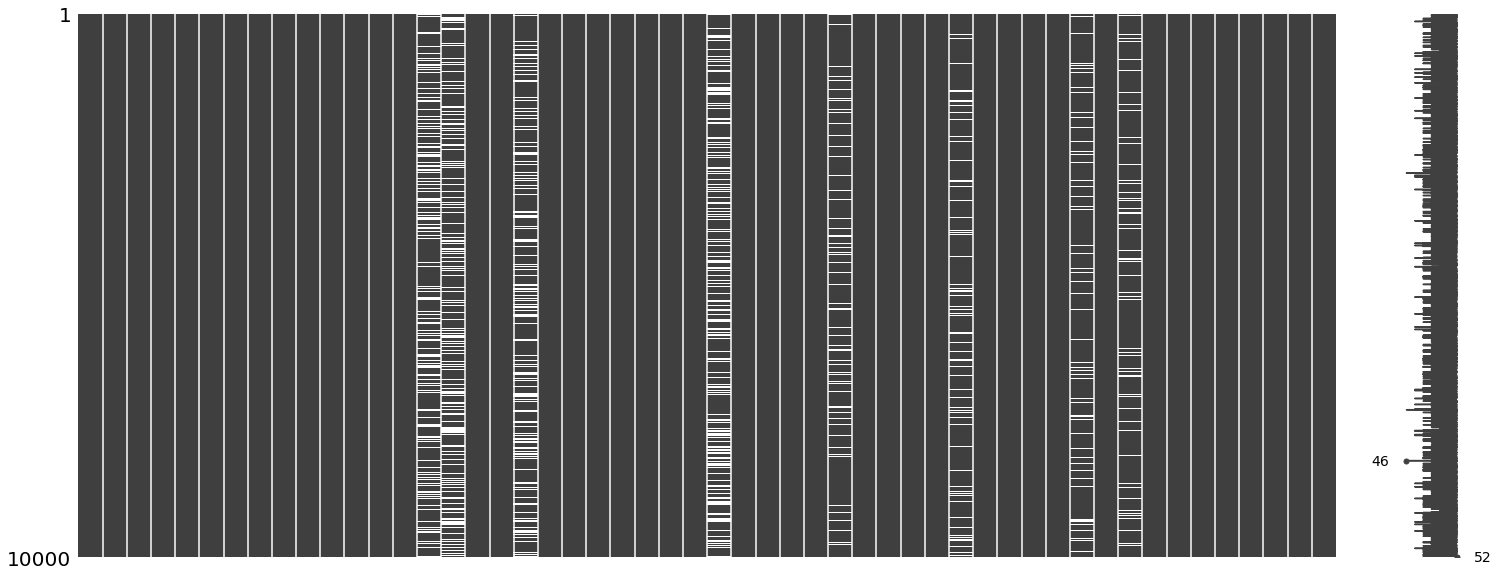

In [11]:
msno.matrix(churn_df)
plt.show()

#### Visualize boxplots of continuous variables to investigate outliers

Normalize values with z-scores to compare boxplots in same plot. Without normalization, we can't compare the distributions to each other. Income and other variables stretch the y axis values too high which shrinks the other boxplots.

In [12]:
churn_anomaly_detect = churn_df[['Population', 'Children', 'Age', 
                         'Income', 'Outage_sec_perweek', 'Email', 
                         'Contacts', 'Yearly_equip_failure', 'Tenure', 
                         'MonthlyCharge', 'Bandwidth_GB_Year']]

churn_anomaly_detect_normalized = (churn_anomaly_detect - churn_anomaly_detect.mean())/churn_anomaly_detect.std()

#### Plot boxplots of all normalized variables to observe any unusual outliers. Only Yearly_equip_failure shows an outlier that is a much higher value than the rest of the dataset. Since the rest of the outliers do not appear to be errors, they are left in the dataset.

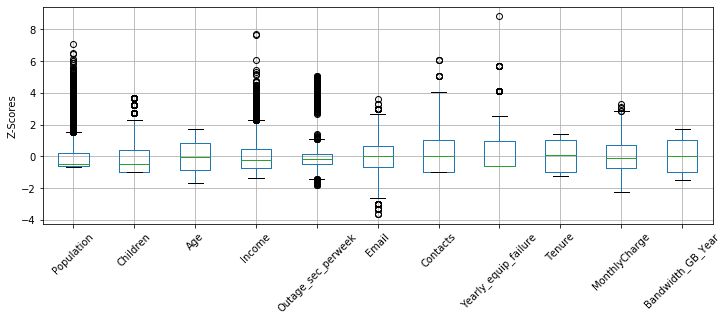

In [13]:
fig, ax = plt.subplots(figsize=[12,4])
churn_anomaly_detect_normalized.boxplot()
plt.xticks(rotation=45)
plt.ylabel('Z-Scores')
plt.show()

#### After investigating the outliers of Yearly_equip_failure further, it appears the maximum value is of 6. This does not appear to be a mistake but is worth looking further into to determine causes of the high amount of equipment failure. 

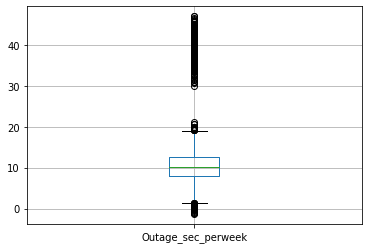

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

In [14]:
churn_df.boxplot('Outage_sec_perweek')
plt.show()
churn_df['Outage_sec_perweek'].describe()

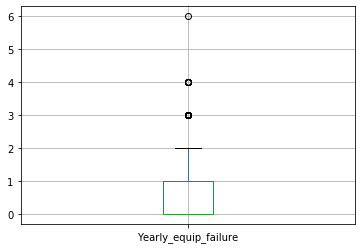

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [15]:
churn_df.boxplot('Yearly_equip_failure')
plt.show()
churn_df['Yearly_equip_failure'].describe()

## Fill Missing Values

#### Age, Tenure, Bandwidth_GB_Year have no outliers and have mean values very close to the median and can be used to impute null values. Children and Income have outliers present that are strongly influencing the mean. Further investigation of outliers to determine if median can be used to impute null values.

#### Investigate Income and Children outliers
Since the outliers do not appear to be errors, they are left in the dataset.

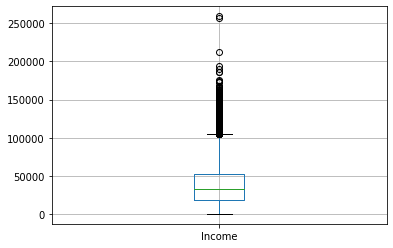

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64

In [16]:
churn_df.boxplot('Income')
plt.show()
churn_df['Income'].describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

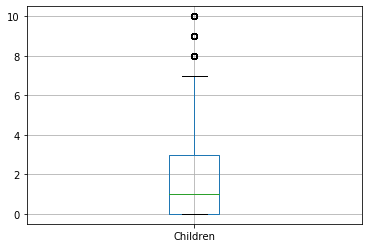

In [17]:
churn_df.boxplot('Children')
churn_df['Children'].describe()

In [18]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

#### Use fillna to impute missing values with the median and mean from the dataset (as identified above)

In [19]:
fillna_median = ['Children', 'Income', 'Age']
fillna_mean = ['Tenure', 'Bandwidth_GB_Year']

for i in fillna_median:
    churn_df[i].fillna(churn_df[i].median(), inplace=True)
    
for i in fillna_mean:
    churn_df[i].fillna(churn_df[i].mean(), inplace=True)

#### Services that include a null are logically without the specified service. Impute "No".

In [20]:
churn_df['Techie'].fillna('No', inplace=True)
churn_df['Phone'].fillna('No', inplace=True)
churn_df['TechSupport'].fillna('No', inplace=True)

#### Check to ensure missing values are filled

In [21]:
churn_df.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

## Convert to numerical data

#### Convert "Yes/No" categorical columns to numeric "1/0" values

In [22]:
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']

for i in converted_columns:
    churn_df[i] = churn_df[i].map({'Yes':1, 'No':0})

## Investigate outliers further

#### Calculate zscores for Income and Children to further investigate outliers

In [23]:
churn_df['Zscore_Income'] = stats.zscore(churn_df['Income'])
churn_df['Zscore_Children'] = stats.zscore(churn_df['Children'])

#### The minimum Income outlier is 113k, the maximum Income outlier is 258k. While these values vary enough from the data set to be classified as outliers, they appear to be valid and will be left in the data set.

In [24]:
income_outliers = churn_df['Income'][(churn_df['Zscore_Income'] > 3) | (churn_df['Zscore_Income'] < -3)]
income_outliers.describe()

count       193.000000
mean     134417.987513
std       22654.953051
min      112687.700000
25%      118120.160000
50%      128114.290000
75%      145569.500000
max      258900.700000
Name: Income, dtype: float64

#### The minimum Children outlier is 8, the maximum Children outlier is 10. While these values vary enough from the data set to be classified as outliers, they appear to be valid and will be left in the data set.

In [25]:
children_outliers = churn_df['Children'][(churn_df['Zscore_Children'] > 3) | (churn_df['Zscore_Children'] < -3)]
children_outliers.describe()

count    302.000000
mean       8.721854
std        0.832552
min        8.000000
25%        8.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: Children, dtype: float64

## Perform principal component analysis

#### Isolate numerical data as pca components

In [26]:
churn_components = churn_df[['Population', 
                             'Children', 
                             'Age', 
                             'Income', 
                             'Churn', 
                             'Outage_sec_perweek', 
                             'Contacts', 
                             'Yearly_equip_failure', 
                             'Techie', 'Port_modem', 
                             'Tablet', 'Phone', 
                             'Multiple', 
                             'OnlineSecurity', 
                             'DeviceProtection', 
                             'TechSupport', 
                             'StreamingTV', 
                             'StreamingMovies', 
                             'PaperlessBilling', 
                             'Tenure', 
                             'MonthlyCharge', 
                             'Bandwidth_GB_Year', 
                             'item1', 
                             'item2', 
                             'item3', 
                             'item4', 
                             'item5', 
                             'item6', 
                             'item7', 
                             'item8']]

#### Preview component data set

In [27]:
churn_components.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,38,1.0,68.0,28561.990,0,6.972566,0,1,0,1,1,1,0,1,0,0,0,1,1,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,10446,1.0,27.0,21704.770,1,12.014541,0,1,1,0,1,1,1,1,0,0,1,1,1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3735,4.0,50.0,33186.785,0,10.245616,0,1,1,1,0,1,1,0,0,0,0,1,1,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,13863,1.0,48.0,18925.230,0,15.206193,2,0,1,0,0,1,0,1,0,0,1,0,1,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,11352,0.0,83.0,40074.190,1,8.960316,2,1,0,1,0,0,0,0,0,1,1,0,0,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


#### Normalize data to standardize weighting of variables (reduce impact of variables with large values)

In [28]:
churn_normalized = (churn_components - churn_components.mean())/churn_components.std()

In [29]:
pca = PCA(n_components=churn_components.shape[1])

In [30]:
pca.fit(churn_normalized)
churn_pca = pd.DataFrame(pca.transform(churn_normalized), columns = ['PC1', 
                                                                      'PC2', 
                                                                      'PC3', 
                                                                      'PC4', 
                                                                      'PC5', 
                                                                      'PC6', 
                                                                      'PC7', 
                                                                      'PC8', 
                                                                      'PC9', 
                                                                      'PC10', 
                                                                      'PC11', 
                                                                      'PC12', 
                                                                      'PC13', 
                                                                      'PC14', 
                                                                      'PC15', 
                                                                      'PC16', 
                                                                      'PC17', 
                                                                      'PC18', 
                                                                      'PC19', 
                                                                      'PC20', 
                                                                      'PC21', 
                                                                      'PC22', 
                                                                      'PC23', 
                                                                      'PC24', 
                                                                      'PC25', 
                                                                      'PC26', 
                                                                      'PC27', 
                                                                      'PC28',
                                                                      'PC29',
                                                                      'PC30'])

#### Create scree plot of components

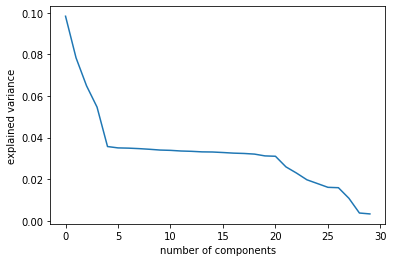

In [31]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

#### Create scree plot of eigenvalues of components
Eigenvalues of less than 1 should not be considered. The first 4 PCA components have eigenvalues of more than 1.5 and should be considered.

In [32]:
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / churn_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

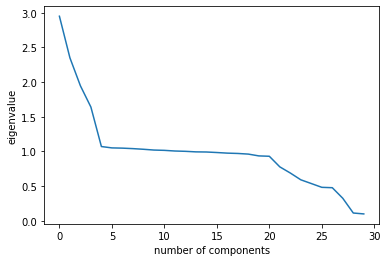

In [33]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

#### Show principal componenet analysis matrix 

In [34]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 
         'PC2', 
         'PC3', 
         'PC4', 
         'PC5', 
         'PC6', 
         'PC7', 
         'PC8', 
         'PC9', 
         'PC10', 
         'PC11', 
         'PC12', 
         'PC13', 
         'PC14', 
         'PC15', 
         'PC16', 
         'PC17', 
         'PC18', 
         'PC19', 
         'PC20', 
         'PC21', 
         'PC22', 
         'PC23', 
         'PC24', 
         'PC25', 
         'PC26', 
         'PC27', 
         'PC28', 
         'PC29', 
         'PC30'],
index=churn_components.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Population,-0.002142,-0.008416,-0.008320,0.013900,-0.077312,-0.279990,-0.275088,-0.194259,-0.152831,-0.075239,0.074026,-0.162727,0.312700,0.030278,0.609551,-0.193929,0.359693,0.294117,0.058727,-0.054878,0.085649,-0.050568,0.019780,-0.018361,0.000982,-0.001880,0.007627,-0.002191,-0.002321,-0.002252
Children,0.000377,-0.000211,-0.004916,0.009134,0.405159,0.089597,0.212273,0.190796,-0.087952,-0.056203,-0.352564,0.435521,-0.101872,0.047849,0.308868,-0.155912,0.153119,-0.096042,-0.253092,0.061704,0.429402,0.037148,-0.039398,-0.014651,0.013821,0.012893,-0.012819,-0.009300,0.007652,-0.016320
Age,0.005046,0.011896,-0.000967,-0.017701,-0.380314,-0.293811,0.238789,0.209936,0.379574,-0.089966,0.051164,-0.019329,0.036928,-0.189364,0.060241,-0.311277,-0.228489,-0.050419,0.247776,0.320627,0.388288,-0.060402,0.016007,-0.003878,-0.009933,0.010402,0.000682,0.015658,-0.010127,0.019218
Income,-0.000731,-0.001610,-0.001849,0.025345,0.106725,0.279090,0.090635,0.258443,0.114819,-0.111398,-0.012654,0.011472,0.683966,-0.028074,0.305361,0.291450,-0.309921,-0.130427,0.040654,0.076221,-0.192695,-0.000247,-0.061129,-0.003013,0.001139,-0.002687,-0.030942,0.004483,-0.000427,0.001787
Churn,-0.003968,0.521368,0.013116,0.025101,-0.018204,0.055586,-0.011184,-0.014295,0.053066,-0.044986,0.001614,0.021195,-0.031209,0.086863,0.049849,0.004754,-0.001921,0.000493,0.003981,0.036238,-0.041675,0.012271,0.017345,0.008069,-0.037229,0.441398,0.711285,0.018036,0.034188,-0.008040
Outage_sec_perweek,-0.013393,0.026494,0.084909,-0.040842,0.423868,-0.150968,0.097839,0.008294,-0.020450,0.193633,0.412387,-0.007776,0.307751,-0.265176,-0.344251,0.012581,0.109831,0.317991,-0.229157,0.264460,0.169744,-0.068792,0.013675,-0.012596,-0.021616,0.052953,0.056337,-0.004340,-0.088278,-0.051312
Contacts,-0.008871,0.002435,0.004906,-0.010122,-0.164850,-0.126850,-0.330380,0.161977,0.453143,-0.070838,0.289505,0.213479,-0.065536,-0.121189,0.067025,0.377185,0.232977,-0.211662,-0.343713,-0.259810,0.161340,0.044432,-0.041596,-0.000964,-0.024081,0.011959,-0.021386,-0.001839,-0.000996,-0.002996
Yearly_equip_failure,-0.007427,-0.014626,0.006449,0.006759,0.129661,-0.213006,0.500464,-0.072993,-0.069575,-0.039001,0.271298,0.162552,-0.099984,0.000047,0.123106,0.340335,0.351658,-0.202220,0.504129,-0.039073,-0.112847,0.018767,0.010791,-0.016762,-0.001498,0.010703,0.005456,-0.020362,0.005108,-0.000326
Techie,-0.001743,0.034493,-0.000046,0.032541,0.072525,0.452470,-0.025133,-0.091334,0.385773,0.158007,-0.056704,-0.404651,0.010113,0.248761,-0.029470,0.016736,0.448950,-0.124632,0.111803,0.319721,0.183539,0.040364,0.010156,0.002639,-0.003283,-0.040219,-0.077448,-0.003444,-0.005725,-0.000317
Port_modem,0.001043,-0.001710,0.009068,-0.011532,-0.055880,-0.286395,0.022981,-0.125641,-0.050664,-0.303953,0.007135,0.117072,0.380526,0.630924,-0.366674,-0.120443,0.072411,-0.268319,-0.113372,-0.005809,0.082769,0.003594,0.007855,0.003450,-0.010887,-0.005352,-0.023975,0.000636,0.001661,0.001121


## PC2

Using a threshold of 0.3. I selected PC2 to explore because of it's high PCA value for the churn (0.52).

    1. Churn: 0.52
    2. Tenure: -0.48
    3. Bandwidth_GB_Year: -0.45
    4. MonthlyCharge: 0.38

#### Validate correlations with scatterplot
Blue markers indicate customer churn, orange indicate customer retention.

Unsurprisingly, shorter tenure correlates to higher churn.

Customers with higher monthly charges and lower bandwidth per year are much more likely to churn (indicated as orange points in the bottom right of the graph below). These customers may be receiving monthly charges that are too high, causing them to cancel their service. Since the estimated cost of obtaining a new customer is 10x higher than retaining one, it might be worth considering a cheaper plan option for users who use less bandwidth per year (possibly an offer before termination of a service).

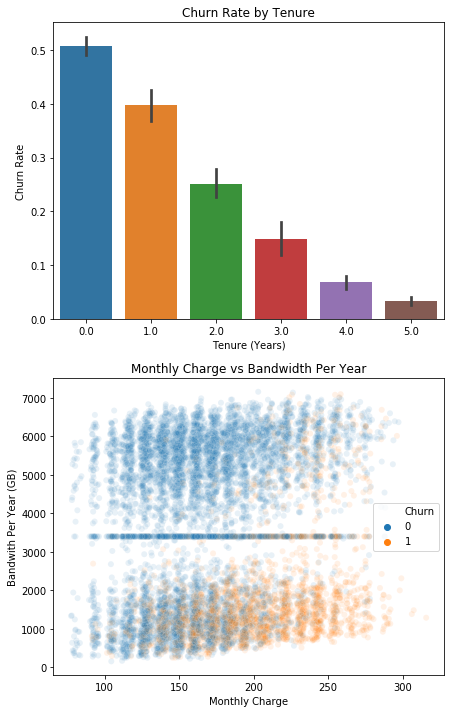

In [35]:
# Set up fig, axis
fig, (ax1, ax2) = plt.subplots(2, figsize=[7,12])

# Simplify Tenure to integer years instead of float for bins to bar plot
churn_df['TenureYears'] = churn_df['Tenure'] // 12

# Bar plot of correlation between Tenure and Churn
sns.barplot(data=churn_df, x='TenureYears', y='Churn', ax=ax1)

# Scatter plot of bivariate analysis of MonthlyCharge and Bandwidth_GB_Year's correlation with Churn
sns.scatterplot(data=churn_df, x='MonthlyCharge', y='Bandwidth_GB_Year', hue='Churn', alpha=0.1, ax=ax2)

# Define plot titles and axis labels
ax1.set_title('Churn Rate by Tenure')
ax1.set_xlabel('Tenure (Years)')
ax1.set_ylabel('Churn Rate')

ax2.set_title('Monthly Charge vs Bandwidth Per Year')
ax2.set_xlabel('Monthly Charge')
ax2.set_ylabel('Bandwith Per Year (GB)')

plt.show()

## Export Cleaned Dataset

In [36]:
churn_df.to_csv('churn_data_cleaned.csv', index=False)

In [37]:
churn_df.to_excel('churn_data_cleaned.xlsx', index=False)